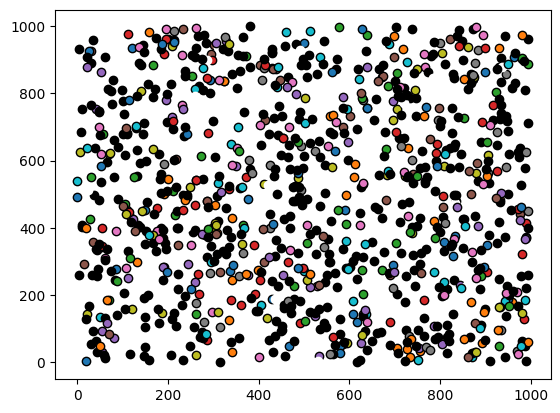

In [1]:
# Task 1 - Ising model using Metropolis–Hastings algorithm
import numpy as np
import matplotlib.pyplot as plt

# размер решетки
N = 1000

X = np.random.choice([0, 1], size=(N + 2, N + 2))

black, white = [], []
for i in range(1, N + 1):
  for j in range(1, N + 1):
    if X[i, j] == 1:
      black.append(i - 1)
      white.append(j - 1)

# параметр
b = 100

# функция для преобразования в тор
def connect(N, A):
  A[0, :] = A[N, :]
  A[:, 0] = A[:, N]
  A[N + 1, :] = A[1, :]
  A[:, N + 1] = A[:, 1]
  return A

# число итераций
n = 1000

for k in range(n):
  X = connect(N, X)
  v1, v2 = np.random.randint(1, N + 1), np.random.randint(1, N + 1)
  U = np.random.uniform()
  if U < np.exp(-2 * b * (X[v1, v2] * X[v1 - 1, v2] + X[v1, v2] * X[v1 + 1, v2]
                     + X[v1, v2] * X[v1, v2 - 1] + X[v1, v2] * X[v1, v2 + 1])):
    X[v1, v2] = abs(X[v1, v2] - 1)
    if X[v1, v2] == 1:
      plt.scatter(v1 - 1, v2 - 1, color="black")
    else:
      plt.scatter(v1 - 1, v2 - 1, color="white")
  else:
    plt.scatter(v1 - 1, v2 - 1, edgecolors='k')

In [ ]:
# Task 2 - PageRank simulation
import numpy as np

# данный граф
graph = np.array([[0, 1, 1, 0, 0, 0],
                  [1, 0, 1, 0, 0, 0],
                  [1, 1, 0, 1, 0, 0],
                  [0, 0, 1, 0, 1, 1], 
                  [0, 0, 0, 1, 0, 0],
                  [0, 0, 0, 1, 0, 0]])
# кол-во рёбер каждой вершины
e = np.sum(graph, axis=0)

P = np.zeros(graph.shape)
for i in range(len(graph)):
  P[i] = graph[i] / e[i]
P = P.T # матрица переходных вероятностей P

def pagerank(P: np.ndarray, d: float, iterations: int):
  nodes = P.shape[0] # кол-во вершин
  vec = np.ones(nodes) / nodes # начальные значения 
  for i in range(iterations):
    # непосредственно формула пейджа для векторов с обновлением vec
    vec = ((1 - d) / nodes) * np.ones(nodes) + d * P.dot(vec)
  return vec

iterations = 1000
d = 1
print(pagerank(P, d, iterations))
d = 0.85
print(pagerank(P, d, iterations))
# на 1000 итераций получаем теоретические значения

In [ ]:
# Task 3 - test of statistical hypothesis
import random

p = 0.95
sphynx = 112
results = []
n = 1000      # how much simulations 

for i in range(n):
    pos_cases = 0
    for j in range(120):
        if random.random() < 0.95:
            pos_cases += 1
    results.append(pos_cases)
results = sorted(results)
critical = results[(round(n * (1 - p)) -1)]
if sphynx < critical:
    print('H0 is not accepted')
else:
    print('H0 is accepted')

In [ ]:
# Task 4 - finding E(xyz) using Gibbs sampling

import numpy as np
# number of generations
n = 1000
# future arrays
x = np.zeros(n)
y = np.zeros(n)
z = np.zeros(n)
# initial values
x[0] = y[0] = z[0] = 1
# sampling
for i in range(1, n):
  x[i] = np.random.gamma(26, 1 / (y[i-1] + z[i-1] + 1))
  y[i] = np.random.gamma(19, 1 / (x[i] + z[i-1] + 1))
  z[i] = np.random.gamma(3, 1 / (x[i] + y[i] + 1))

e = np.mean(x * y * z)
print(e)
# on n=10^6 E(xyz) is approximately 4.43